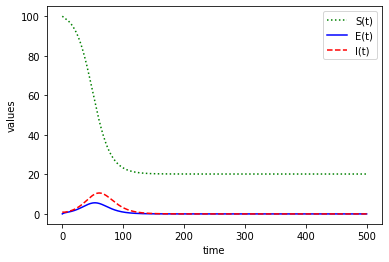

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,De,Di):
    R0 = 2
    N = sum(z)
    S = z[0]
    E = z[1]
    I = z[2]
    R = z[3]
    dSdt = -(S*I*R0)/(Di*N)
    dEdt = S*I*R0/(Di*N)-E/De
    dIdt = E/De - I/Di
    dRdt = I/Di
    dzdt = [dSdt, dEdt, dIdt, dRdt]
    return dzdt

# R node
De = 4
Di = 8
# initial condition
z0 = [100,0,1,0]

# number of time points
n = 401

# time points
t = np.linspace(0,500,n)

# store solution
S = np.empty_like(t)
E = np.empty_like(t)
I = np.empty_like(t)
R = np.empty_like(t)

# record initial conditions
S[0] = z0[0]
E[0] = z0[1]
I[0] = z0[2]
R[0] = z0[3]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(De,Di))
    # store solution for plotting
    S[i] = z[1][0]
    E[i] = z[1][1]
    I[i] = z[1][2]
    R[i] = z[1][3]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,S,'g:',label='S(t)')
plt.plot(t,E,'b-',label='E(t)')
plt.plot(t,I,'r--',label='I(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

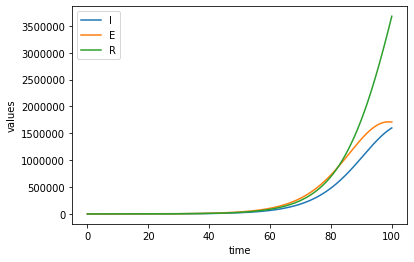

In [100]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

def sigma(t):
    return 1/(1 + np.exp(t))

travel_cutoff = 20
bats_cutoff = 5
z_func = lambda t: 86*sigma(2*(t-bats_cutoff))
L_cutoff_func = lambda t: sigma(2*(t-travel_cutoff))

def L(t):
    L = np.zeros((M, M))
    # L[0, 1] = 10000
    # L[1, 2] = 10000
    # L[2, 0] = 10000
    # L[0, 1] = 3244
    # L[0, 2] = 17119
    # L[0, :] *= L_cutoff_func(t)
    # L[:, 0] *= L_cutoff_func(t)
    return L

def model(z_flat, t):
    z = np.reshape(z_flat, newshape = (4, M))
    s, e, i, r = [z[0, :], z[1, :], z[2, :], z[3, :]]
    n = np.sum(z, axis = 0)
    R0 = g_params['R0']
    De = g_params['De']
    Di = g_params['Di']
    alpha = g_params['alpha']
    
    ds = -s/n*(R0/Di*i + alpha*z_func(t)) + (np.matmul(np.transpose(L(t)), s/n) - s/n*np.matmul(L(t), np.ones(M)))
    de = s/n*(R0/Di*i + alpha*z_func(t)) - e/De + (np.matmul(np.transpose(L(t)), e/n) - e/n*np.matmul(L(t), np.ones(M)))
    di = e/De - i/Di + (np.matmul(np.transpose(L(t)), i/n) - i/n*np.matmul(L(t), np.ones(M)))
    dr = i/Di + (np.matmul(np.transpose(L(t)), r/n) - r/n*np.matmul(L(t), np.ones(M)))
    dz = np.array([ds, de, di, dr])
    return np.reshape(dz, newshape = (1, 4*M))[0]
 
# consider M countries 
M = 3
n0 = 100
c_params = [{''} for i in range(0, M)] # country-specific parameters
g_params = {'R0': 3, 'De': 6.5, 'Di': 7, 'alpha': np.zeros(M)} # global model parameters
g_params['alpha'][0] = 1
# L = np.ones((M, M)) # matrix of travel rates; L(i, j) = rate of travel from country i --> country j

s0 = np.array([11.08e6, # Wuhan
               1.386e9, # Rest of China
               3.08e9]) # Rest of Asia
e0 = np.zeros(M)
i0 = np.zeros(M)
r0 = np.zeros(M)
z0 = np.array([s0, e0, i0, r0]) # z = [s e i r]

n = 1000
t = np.linspace(0, 100, n)
# solve ODE

S = np.zeros((n, M))
E = np.zeros((n, M))
I = np.zeros((n, M))
R = np.zeros((n, M))

S[0] = z0[0, :]
E[0] = z0[1, :]
I[0] = z0[2, :]
R[0] = z0[3, :]
    
z0 = np.reshape(np.array([s0, e0, i0, r0]), newshape = (1, 4*M))[0] # z = [s e i r]

for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan)[1]
    z = np.reshape(z, newshape = (4, M))
    
    S[i] = z[0, :]
    E[i] = z[1, :]
    I[i] = z[2, :]
    R[i] = z[3, :]

    z0 = np.reshape(z, newshape = (1, 4*M))[0]
    
# plt.figure()
# plt.subplot(1, 3, 1)
# plt.plot(t, S[:, 0], label = 'S')
plt.plot(t, I[:, 0], label = 'I')
plt.plot(t, E[:, 0], label = 'E') 
plt.plot(t, R[:, 0], label = 'R') 

plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()
# 
# plt.subplot(1, 3, 2)
# plt.plot(t, S[:, 1])
# plt.plot(t, I[:, 1])
# plt.plot(t, E[:, 1])
# plt.plot(t, R[:, 1]) 
# 
# plt.subplot(1, 3, 3)
# plt.plot(t, S[:, 2])
# plt.plot(t, I[:, 2])
# plt.plot(t, E[:, 2])
# plt.plot(t, R[:, 2]) 
# 
# plt.figure()
# plt.subplot(2, 1, 1)
# plt.plot(t, z_func(t))
# plt.title('z(t)')
# plt.subplot(2, 1, 2)
# plt.title('L_cutoff(t)')
# plt.plot(t, L_cutoff_func(t))

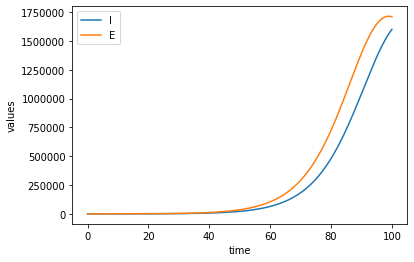

In [101]:
plt.plot(t, I[:, 0], label = 'I')
plt.plot(t, E[:, 0], label = 'E') 

plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

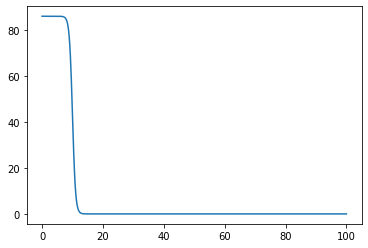

In [98]:
plt.plot(t, z_func(t))